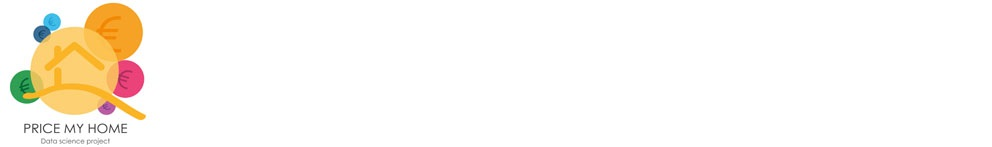

> ### <font color= "1F284B" >**EDA**</font><font color= "3B4D90" >_Análisis exploratorio de datos del Dataset.</font>

---------

##### <font color= "1F284B" >PASO 0. IMPORTAR LIBRERÍAS.</font>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
import numpy as np
import json
import plotly.express as px

---------

##### <font color= "1F284B" >PASO 1. ABRIR EL DATASET.</font>

In [2]:
df = pd.read_excel("C:/Users/nuria/Bootcamp Data Science/Proyecto Final/PriceMyHome_Jesús Barrón - Nuria Valls_31.03.2021/PARTE 0.2. Dataset pisos con barrios.xlsx", index_col = 0)

In [3]:
df

Distrito   Barrios   m2  Habitaciones  Baños  Precio/m2  Precio  \
1      Carabanchel  Abrantes   99             4      1     2194.0  217206   
2      Carabanchel  Abrantes  100             3      2     3250.0  325000   
3      Carabanchel  Abrantes   87             2      2     1724.0  149988   
4      Carabanchel  Abrantes   88             3      1     1578.0  138864   
5      Carabanchel  Abrantes   62             3      1     2694.0  167028   
...            ...       ...  ...           ...    ...        ...     ...   
17733        Usera     Zofío   57             1      1     2509.0  143013   
17734        Usera     Zofío   56             1      1     2366.0  132496   
17735        Usera     Zofío   60             2      1     2317.0  139020   
17736        Usera     Zofío   51             3      1     2141.0  109191   
17737        Usera     Zofío  121             0      1     2115.0  255915   

       Población  0-15 años  0-15 años%  ...  \
1          31947       5136   16.076627  ...   
2          31947       5136   16.076627  ...   
3          31947       5136   16.076627  ...   
4          31947       5136   16.076627  ...   
5          31947       5136   16.076627  ...   
...          ...        ...         ...  ...   
17733      14412       1958   13.585901  ...   
17734      14412       1958   13.585901  ...   
17735      14412       1958   13.585901  ...   
17736      14412       1958   13.585901  ...   
17737      14412       1958   13.585901  ...   

       Delitos Intervencon Policial Ratio  Delitos contra seguridad vial  \
1                                0.247285                             37   
2                                0.247285                             37   
3                                0.247285                             37   
4                                0.247285                             37   
5                                0.247285                             37   
...                                   ...                            ...   
17733                            0.263669                             15   
17734                            0.263669                             15   
17735                            0.263669                             15   
17736                            0.263669                             15   
17737                            0.263669                             15   

       Delitos contra seguridad vial Ratio  Precio feb 2021  \
1                                 0.115817             2216   
2                                 0.115817             2216   
3                                 0.115817             2216   
4                                 0.115817             2216   
5                                 0.115817             2216   
...                                    ...              ...   
17733                             0.104080             1925   
17734                             0.104080             1925   
17735                             0.104080             1925   
17736                             0.104080             1925   
17737                             0.104080             1925   

       Variación mensual  Variación trimestral  Variación anual  \
1                   -1.5                  -0.7           -1.100   
2                   -1.5                  -0.7           -1.100   
3                   -1.5                  -0.7           -1.100   
4                   -1.5                  -0.7           -1.100   
5                   -1.5                  -0.7           -1.100   
...                  ...                   ...              ...   
17733               -3.5                  -0.1            0.019   
17734               -3.5                  -0.1            0.019   
17735               -3.5                  -0.1            0.019   
17736               -3.5                  -0.1            0.019   
17737               -3.5                  -0.1            0.019   

       Máximo histórico(precio)  

In [4]:
df.columns

Index(['Distrito', 'Barrios', 'm2', 'Habitaciones', 'Baños', 'Precio/m2',
       'Precio', 'Población', '0-15 años', '0-15 años%', '16-64 años',
       '16-64 años %', '65 o más años ', '65 o más años %', 'Edad promedio',
       'Densidad', 'Superficie',
       'Índice de la estructura de la población activa', 'Tasa de desempleo',
       'Nacimientos', 'Nacimientos Ratio', 'Defunciones', 'Defunciones Ratio',
       'Inmigración', 'Inmigración Ratio', 'Emigración', 'Emigración Ratio',
       'Renta neta media anual de los hogares\n', 'Actividades economicas',
       'Educacion', 'Centros Universitarios', 'Sanidad', 'Bibliotecas',
       'Instalaciones deportivas(Polideportivos, no básicas',
       'Zonas verdes (m2)', 'Latidud', 'Longitud', 'Distancia al centro (km)',
       'Metro', 'Tren', 'Autobus', 'Calidad del aire', 'PM2,5', 'PM10', 'NO2',
       'O3', 'SO2', 'Monumentos', 'Ocio/cultura', 'Residuos generados',
       'Residuos Ratio', 'Seguridad Percibida día',
       'Seguridad P

In [5]:
df["Bibliotecas"].value_counts()

0    10732
1     5653
2     1237
3       97
Name: Bibliotecas, dtype: int64

---------

##### <font color= "1F284B" >PASO 2. ANÁLISIS DE LOS MUNICIPIOS.</font>

<font color= "1F284B" >ESTUDIO DEMOGRÁFICO DEL DATASET.</font>

<font color= "1F284B" >- Cantidad de población del distrito, clasificada por edades.</font>

<font color= "1F284B" >En la primera gráfica se puede observar la cantidad total de la población que tiene un distrito, divido por población de 0 a 15 años, de 16 a 64 años y de 65 o más años.</font>

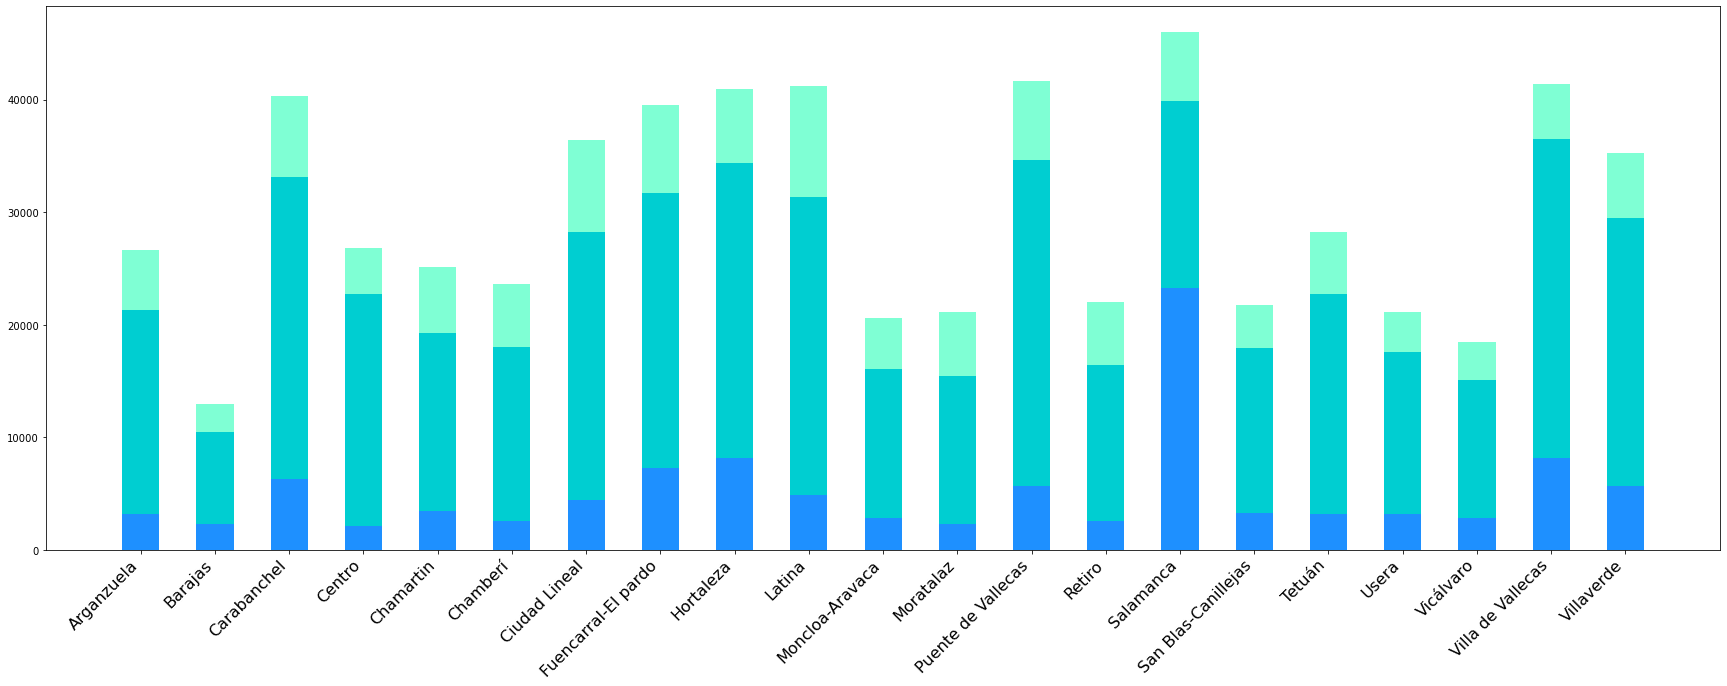

In [6]:
fig, ax = plt.subplots(figsize=(30,10))

df_agrupado_distritos = df.groupby("Distrito").mean()
df_agrupado_distritos = df_agrupado_distritos.reset_index()
etiquetas = list(df_agrupado_distritos["Distrito"])

valores = df_agrupado_distritos["0-15 años"]
valores1 = df_agrupado_distritos["16-64 años"]
valores2 = df_agrupado_distritos["65 o más años "]


x = np.arange(len(etiquetas)) 
ancho=0.5
plt.bar(etiquetas,valores, ancho, color="dodgerblue")
plt.bar(etiquetas, valores1, ancho ,color="darkturquoise", bottom=valores)
plt.bar(etiquetas, valores2, ancho ,color="aquamarine", bottom=(np.array(valores1) + np.array(valores)))

plt.xticks(rotation=45, horizontalalignment='right')

ax.set_xticks(x)
ax.set_xticklabels(etiquetas, fontsize = 16)

plt.show()

<font color= "1F284B" >En la segunda gráfica se puede observar el ratio total de cada una de las clases, con él podemos ver los porcentajes de cada grupo de población que hay.</font>

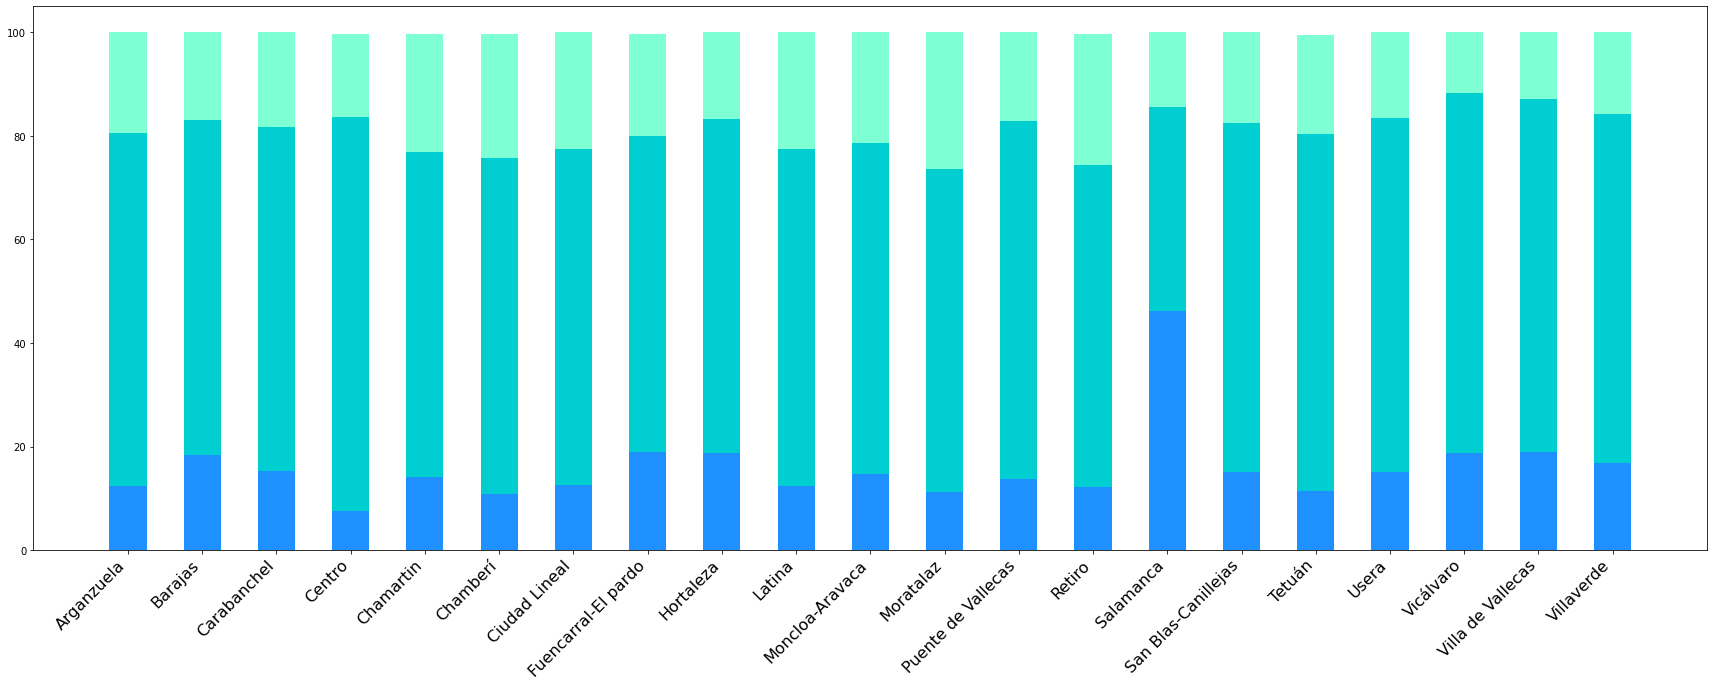

In [7]:
fig, ax = plt.subplots(figsize=(30,10))

df_agrupado_distritos = df.groupby("Distrito").mean()
df_agrupado_distritos = df_agrupado_distritos.reset_index()
etiquetas = list(df_agrupado_distritos["Distrito"])

valores= df_agrupado_distritos["0-15 años%"]
valores1=df_agrupado_distritos["16-64 años %"]
valores2=df_agrupado_distritos["65 o más años %"]


x = np.arange(len(etiquetas)) 
ancho=0.5
plt.bar(etiquetas,valores, ancho, color="dodgerblue")
plt.bar(etiquetas, valores1, ancho ,color="darkturquoise", bottom=valores)
plt.bar(etiquetas, valores2, ancho ,color="aquamarine", bottom=(np.array(valores1) + np.array(valores)))

plt.xticks(rotation=45, horizontalalignment='right')

ax.set_xticks(x)
ax.set_xticklabels(etiquetas, fontsize = 16)

plt.show()

<font color= "1F284B" >- Nacimientos y defunciones.</font>

<font color= "1F284B" >En primer lugar se hace un análisis pormenorizado del ratio de los nacimientos por distrito. 
En la gráfica se observa, ordenada de mayor a menor, esta variable.</font>

In [8]:
df_nacimientos = df.sort_values("Nacimientos Ratio", ascending = False).groupby("Distrito")["Nacimientos Ratio"].mean()
df_nacimientos = pd.DataFrame(df_nacimientos).reset_index().sort_values("Nacimientos Ratio", ascending =False)

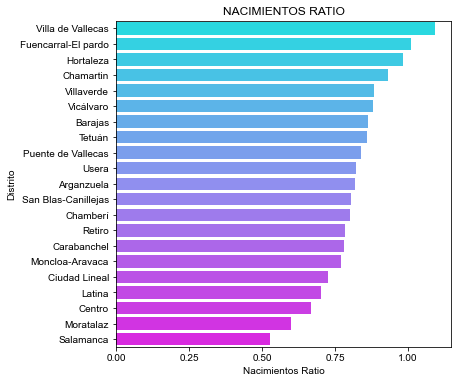

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="Nacimientos Ratio", y="Distrito", data=df_nacimientos,
            palette="cool").set_title(("Nacimientos Ratio").upper()) 
sns.set(font_scale = 2)
plt.show()

<font color= "1F284B" >En segundo lugar se hace un análisis pormenorizado del ratio de los defunciones por distrito. 
En la gráfica se observa, ordenada de mayor a menor, esta variable.</font>

In [10]:
df_defunciones = df.sort_values("Defunciones Ratio", ascending = False).groupby("Distrito")["Defunciones Ratio"].mean()
df_defunciones = pd.DataFrame(df_defunciones).reset_index().sort_values("Defunciones Ratio", ascending =False)

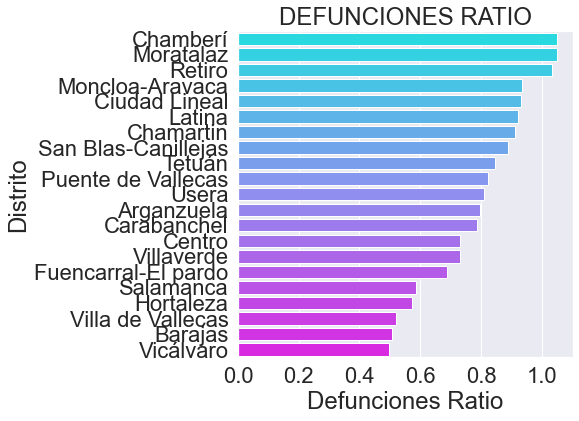

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="Defunciones Ratio", y="Distrito", data=df_defunciones,
            palette="cool").set_title(("Defunciones Ratio").upper()) 
sns.set(font_scale = 1)
plt.show()

<font color= "1F284B" >En tercer lugar se hace un análisis comparativo de los dos anteriores, para ver la natalidad y mortalidad en cada distrito.</font>

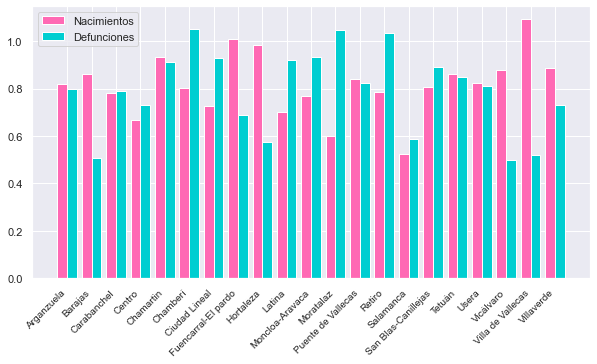

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
etiquetas= list(df_agrupado_distritos["Distrito"])
nacimientos = list(df_agrupado_distritos["Nacimientos Ratio"])
defunciones = list(df_agrupado_distritos["Defunciones Ratio"])

x = np.arange(len(etiquetas))  
ancho=0.4
plt.bar(x - ancho/2, nacimientos, ancho, color="hotpink", label = "Nacimientos")
plt.bar(x + ancho/2, defunciones, ancho ,color="darkturquoise", label = "Defunciones")

ax.legend()

plt.xticks(rotation=45, horizontalalignment='right')
ax.set_xticks(x) #marcadores en eje x es la x
ax.set_xticklabels(etiquetas,fontsize = 10) #marcadores en eje x es las etiquetas
plt.show()

-------------------------------------

<font color= "1F284B" >- Emigrantes e inmigrantes.</font>

<font color= "1F284B" >En primer lugar se hace un análisis pormenorizado del ratio de la emigración por distrito. 
En la gráfica se observa, ordenada de mayor a menor, esta variable.</font>

In [13]:
df_emi = df.sort_values("Emigración", ascending = False).groupby("Distrito")["Emigración"].mean()
df_emi = pd.DataFrame(df_emi).reset_index().sort_values("Emigración", ascending =False)

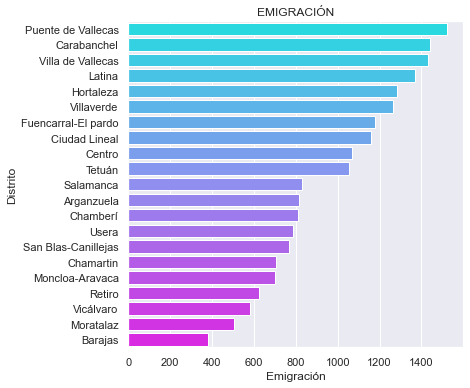

In [14]:
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="Emigración", y="Distrito", data=df_emi,
            palette="cool").set_title(("Emigración").upper()) 
sns.set(font_scale = 1)
plt.show()

<font color= "1F284B" >En segundo lugar se hace un análisis pormenorizado del ratio de la inmigración por distrito. 
En la gráfica se observa, ordenada de mayor a menor, esta variable.</font>

In [15]:
df_inmi = df.sort_values("Inmigración", ascending = False).groupby("Distrito")["Inmigración"].mean()
df_inmi = pd.DataFrame(df_inmi).reset_index().sort_values("Inmigración", ascending =False)

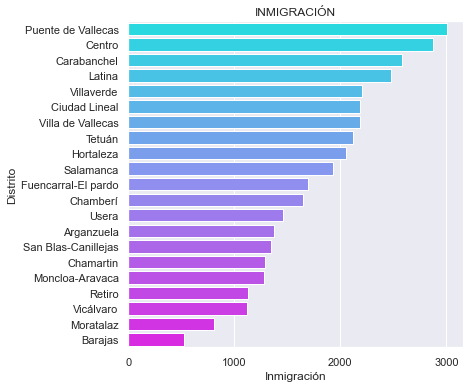

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="Inmigración", y="Distrito", data=df_inmi,
            palette="cool").set_title(("Inmigración").upper()) 
sns.set(font_scale = 1.5)
plt.show()

<font color= "1F284B" >En tercer lugar se hace un análisis comparativo de los dos anteriores, para ver la emigración e inmigración en cada distrito.</font>

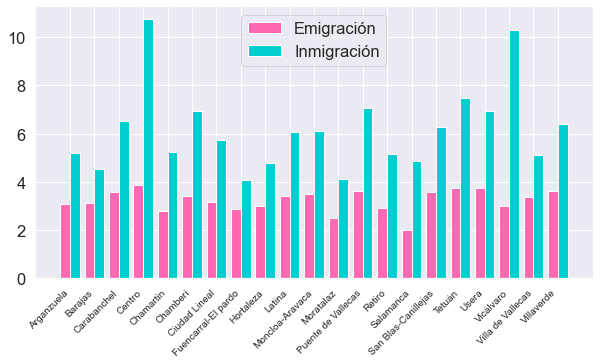

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
etiquetas= list(df_agrupado_distritos["Distrito"])
nacimientos = list(df_agrupado_distritos["Emigración Ratio"])
defunciones = list(df_agrupado_distritos["Inmigración Ratio"])

x = np.arange(len(etiquetas))  
ancho=0.4
plt.bar(x - ancho/2, nacimientos, ancho, color="hotpink", label = "Emigración")
plt.bar(x + ancho/2, defunciones, ancho ,color="darkturquoise", label = "Inmigración")

ax.legend()

plt.xticks(rotation=45, horizontalalignment='right')
ax.set_xticks(x) #marcadores en eje x es la x
ax.set_xticklabels(etiquetas,fontsize = 10) #marcadores en eje x es las etiquetas
plt.show()

-----------------------------------

<font color= "1F284B" >- Análisis en mapa de la densidad de población y la edad promedio por distrito.</font>

<font color= "1F284B" >Creamos un dataframe agrupado por distritos y nos quedamos con la densidad.</font>

In [18]:
df_densidadpoblacion = df.sort_values("Densidad", ascending = False).groupby("Distrito")["Densidad"].mean()
df_densidadpoblacion = pd.DataFrame(df_densidadpoblacion).reset_index().sort_values("Densidad", ascending =False)

<font color= "1F284B" >Creamos un dataframe agrupado por distritos y nos quedamos con la edad promedio.</font>

In [19]:
df_edadmedia = df.sort_values("Edad promedio", ascending = False).groupby("Distrito")["Edad promedio"].mean()
df_edadmedia = pd.DataFrame(df_edadmedia).reset_index().sort_values("Edad promedio", ascending =False)

<font color= "1F284B" >Abrimos un geo_json con las coordenadas de los límites de los distritos.</font>

In [20]:
with open('C:/Users/nuria/Bootcamp Data Science/02. Febrero/json/madrid_prueba.json',encoding ="utf-8") as f: 
    datos = json.load(f)

<font color= "1F284B" >Creamos las capas que va a tener nuestro mapa.</font>

In [34]:
lat_madrid = 40.4167
long_madrid = -3.70325
mapa_madrid = folium.Map(location=[lat_madrid, long_madrid], tiles=None, zoom_start=10, overlay=False)
fg0 = folium.FeatureGroup(name="Densidad por barrio(habitantes/km2)", overlay=False).add_to(mapa_madrid)
fg1 = folium.FeatureGroup(name="Edad promedio por barrio", overlay=False).add_to(mapa_madrid)


choropleth = folium.Choropleth(
    geo_data=datos,
    highlight=False,
    name="Densidad por barrio(habitantes/km2)",
    data=df_densidadpoblacion,
    columns=["Distrito", "Densidad"],
    key_on='feature.properties.name',
    fill_color='YlGnBu'
).geojson.add_to(fg0)

choropleth1 = folium.Choropleth(
    geo_data=datos,
    name="Edad promedio por barrio",
    data=df_edadmedia,
    columns=["Distrito", "Edad promedio"],
    key_on='feature.properties.name',
    fill_color='YlGnBu'
).geojson.add_to(fg1)

<font color= "1F284B" >Le damos características a las capas.</font>

In [35]:
style_function = "font-size: 16px; font-weight: bold"
folium.features.GeoJsonTooltip(
    ['name'],
    style=style_function,
    labels=False
).add_to(choropleth)

folium.features.GeoJsonTooltip(
    ['name'],
    style=style_function,
    labels=False
).add_to(choropleth1)

folium.TileLayer(
    "cartodbpositron",
    overlay=True,
    name="light mode"
).add_to(choropleth)

folium.TileLayer(
    "cartodbpositron",
    overlay=True,
    name="light mode"
).add_to(choropleth1)

pines = plugins.MarkerCluster().add_to(choropleth)

for lat, lng, label, in zip(df_agrupado_distritos.Latidud, df_agrupado_distritos.Longitud, df.Población):
    folium.Marker(location=[lat, lng],
                  icon=folium.DivIcon(icon_size=(200,36),
                                      icon_anchor=(0,0),
                                      html='<div style="font-size: 10pt">Densidad: %s</div>' % label)
                 ).add_to(pines)
pines2 = plugins.MarkerCluster().add_to(choropleth1)

for lat, lng, label, in zip(df_agrupado_distritos.Latidud, df_agrupado_distritos.Longitud, round(df_agrupado_distritos["Edad promedio"],2)):
    folium.Marker(location=[lat, lng],
                  icon=folium.DivIcon(icon_size=(200,36),
                                      icon_anchor=(0,0),
                                      html='<div style="font-size: 10pt">Edad promedio: %s</div>' % label)
                 ).add_to(pines2)
    
folium.LayerControl(collapsed=False).add_to(mapa_madrid)
mapa_madrid

<font color= "1F284B" >ESTUDIO SOCIOECONÓMICO DEL DATASET.</font>

<font color= "1F284B" >- Análisis en mapa de las actividades económicas de los distrito.</font>

<font color= "1F284B" >Creamos las capas que va a tener nuestro mapa.</font>

In [25]:
lat_madrid1 = 40.4167
long_madrid1 = -3.70325
mapa_madrid1 = folium.Map(location=[lat_madrid1, long_madrid1], tiles=None, zoom_start=10, overlay=False)
fg0_mapa2 = folium.FeatureGroup(name="Renta por barrio", overlay=False).add_to(mapa_madrid1)
fg1_mapa2 = folium.FeatureGroup(name="Número de actividades económicas por barrio", overlay=False).add_to(mapa_madrid1)
fg2_mapa2 = folium.FeatureGroup(name="Educación", overlay=False).add_to(mapa_madrid1)
fg3_mapa2 = folium.FeatureGroup(name="Sanidad", overlay=False).add_to(mapa_madrid1)
fg4_mapa2 = folium.FeatureGroup(name="Bibliotecas", overlay=False).add_to(mapa_madrid1)
fg5_mapa2 = folium.FeatureGroup(name="Instalaciones deportivas", overlay=False).add_to(mapa_madrid1)
fg6_mapa2 = folium.FeatureGroup(name="Tasa de desempleo", overlay=False).add_to(mapa_madrid1)

choropleth_mapa2_1 = folium.Choropleth(
    geo_data=datos,
    highlight=False,
    name="Renta por barrio",
    data=df_agrupado_distritos,
    columns=["Distrito", "Renta neta media anual de los hogares\n"],
    key_on='feature.properties.name',
    fill_color='YlGnBu'
).geojson.add_to(fg0_mapa2)

choropleth_mapa2_2 = folium.Choropleth(
    geo_data=datos,
    name="Número de actividades económicas por barrio",
    data=df_agrupado_distritos,
    columns=["Distrito", "Actividades economicas"],
    key_on='feature.properties.name',
    fill_color='YlGnBu'
).geojson.add_to(fg1_mapa2)

choropleth_mapa2_3 = folium.Choropleth(
    geo_data=datos,
    name="Educación",
    data=df_agrupado_distritos,
    columns=["Distrito", "Educacion"],
    key_on='feature.properties.name',
    fill_color='YlGnBu'
).geojson.add_to(fg2_mapa2)

choropleth_mapa2_4 = folium.Choropleth(
    geo_data=datos,
    name="Sanidad",
    data=df_agrupado_distritos,
    columns=["Distrito", "Sanidad"],
    key_on='feature.properties.name',
    fill_color='YlGnBu'
).geojson.add_to(fg3_mapa2)

choropleth_mapa2_5 = folium.Choropleth(
    geo_data=datos,
    name="Bibliotecas",
    data=df_agrupado_distritos,
    columns=["Distrito", "Bibliotecas"],
    key_on='feature.properties.name',
    fill_color='YlGnBu'
).geojson.add_to(fg4_mapa2)

choropleth_mapa2_6 = folium.Choropleth(
    geo_data=datos,
    name="Instalaciones deportivas",
    data=df_agrupado_distritos,
    columns=["Distrito", "Instalaciones deportivas(Polideportivos, no básicas"],
    key_on='feature.properties.name',
    fill_color='YlGnBu'
).geojson.add_to(fg5_mapa2)

choropleth_mapa2_7 = folium.Choropleth(
    geo_data=datos,
    name="Tasa de desempleo",
    data=df_agrupado_distritos,
    columns=["Distrito", "Tasa de desempleo"],
    key_on='feature.properties.name',
    fill_color='YlGnBu'
).geojson.add_to(fg6_mapa2)

<font color= "1F284B" >Le damos características a las capas.</font>

In [26]:
style_function = "font-size: 16px; font-weight: bold"

folium.features.GeoJsonTooltip(
    ['name'],
    style=style_function,
    labels=False
).add_to(choropleth_mapa2_1)

folium.features.GeoJsonTooltip(
    ['name'],
    style=style_function,
    labels=False
).add_to(choropleth_mapa2_2)

folium.features.GeoJsonTooltip(
    ['name'],
    style=style_function,
    labels=False
).add_to(choropleth_mapa2_3)

folium.features.GeoJsonTooltip(
    ['name'],
    style=style_function,
    labels=False
).add_to(choropleth_mapa2_4)

folium.features.GeoJsonTooltip(
    ['name'],
    style=style_function,
    labels=False
).add_to(choropleth_mapa2_5)

folium.features.GeoJsonTooltip(
    ['name'],
    style=style_function,
    labels=False
).add_to(choropleth_mapa2_6)

folium.features.GeoJsonTooltip(
    ['name'],
    style=style_function,
    labels=False
).add_to(choropleth_mapa2_7)

folium.TileLayer(
    "cartodbpositron",
    overlay=True,
    name="light mode"
).add_to(choropleth_mapa2_1)

folium.TileLayer(
    "cartodbpositron",
    overlay=True,
    name="light mode"
).add_to(choropleth_mapa2_2)

folium.TileLayer(
    "cartodbpositron",
    overlay=True,
    name="light mode"
).add_to(choropleth_mapa2_3)

folium.TileLayer(
    "cartodbpositron",
    overlay=True,
    name="light mode"
).add_to(choropleth_mapa2_4)

folium.TileLayer(
    "cartodbpositron",
    overlay=True,
    name="light mode"
).add_to(choropleth_mapa2_5)

folium.TileLayer(
    "cartodbpositron",
    overlay=True,
    name="light mode"
).add_to(choropleth_mapa2_6)

folium.TileLayer(
    "cartodbpositron",
    overlay=True,
    name="light mode"
).add_to(choropleth_mapa2_7)

pines_mapa2_1 = plugins.MarkerCluster().add_to(choropleth_mapa2_1)

for lat, lng, label, in zip(df_agrupado_distritos.Latidud, df_agrupado_distritos.Longitud, round(df_agrupado_distritos["Renta neta media anual de los hogares\n"],2)):
    folium.Marker(location=[lat, lng],
                  icon=folium.DivIcon(icon_size=(200,36),
                                      icon_anchor=(0,0),
                                      html='<div style="font-size: 10pt">Renta por distrito: %s</div>' % label)
                 ).add_to(pines_mapa2_1)
    
pines_mapa2_2 = plugins.MarkerCluster().add_to(choropleth_mapa2_2)

for lat, lng, label, in zip(df_agrupado_distritos.Latidud, df_agrupado_distritos.Longitud, round(df_agrupado_distritos["Actividades economicas"],2)):
    folium.Marker(location=[lat, lng],
                  icon=folium.DivIcon(icon_size=(200,36),
                                      icon_anchor=(0,0),
                                      html='<div style="font-size: 10pt">Número de actividades económicas por distrito: %s</div>' % label)
                 ).add_to(pines_mapa2_2)

pines_mapa2_3 = plugins.MarkerCluster().add_to(choropleth_mapa2_3)

for lat, lng, label, in zip(df_agrupado_distritos.Latidud, df_agrupado_distritos.Longitud, round(df_agrupado_distritos["Educacion"],2)):
    folium.Marker(location=[lat, lng],
                  icon=folium.DivIcon(icon_size=(200,36),
                                      icon_anchor=(0,0),
                                      html='<div style="font-size: 10pt">Educación: %s</div>' % label)
                 ).add_to(pines_mapa2_3)

pines_mapa2_4 = plugins.MarkerCluster().add_to(choropleth_mapa2_4)

for lat, lng, label, in zip(df_agrupado_distritos.Latidud, df_agrupado_distritos.Longitud, round(df_agrupado_distritos["Sanidad"],2)):
    folium.Marker(location=[lat, lng],
                  icon=folium.DivIcon(icon_size=(200,36),
                                      icon_anchor=(0,0),
                                      html='<div style="font-size: 10pt">Sanidad: %s</div>' % label)
                 ).add_to(pines_mapa2_4)

pines_mapa2_5 = plugins.MarkerCluster().add_to(choropleth_mapa2_5)

for lat, lng, label, in zip(df_agrupado_distritos.Latidud, df_agrupado_distritos.Longitud, round(df_agrupado_distritos["Bibliotecas"].astype("float"),2)):
    folium.Marker(location=[lat, lng],
                  icon=folium.DivIcon(icon_size=(200,36),
                                      icon_anchor=(0,0),
                                      html='<div style="font-size: 10pt">Bibliotecas: %s</div>' % label)
                 ).add_to(pines_mapa2_5)

pines_mapa2_6 = plugins.MarkerCluster().add_to(choropleth_mapa2_6)

for lat, lng, label, in zip(df_agrupado_distritos.Latidud, df_agrupado_distritos.Longitud, round(df_agrupado_distritos["Instalaciones deportivas(Polideportivos, no básicas"],2)):
    folium.Marker(location=[lat, lng],
                  icon=folium.DivIcon(icon_size=(200,36),
                                      icon_anchor=(0,0),
                                      html='<div style="font-size: 10pt">Instalaciones deportivas: %s</div>' % label)
                 ).add_to(pines_mapa2_6)
    
pines_mapa2_7 = plugins.MarkerCluster().add_to(choropleth_mapa2_7)

for lat, lng, label, in zip(df_agrupado_distritos.Latidud, df_agrupado_distritos.Longitud, round(df_agrupado_distritos["Tasa de desempleo"].astype("float"),2)):
    folium.Marker(location=[lat, lng],
                  icon=folium.DivIcon(icon_size=(200,36),
                                      icon_anchor=(0,0),
                                      html='<div style="font-size: 10pt">Tasa de desempleo: %s</div>' % label)
                 ).add_to(pines_mapa2_7)


folium.LayerControl(collapsed=False).add_to(mapa_madrid1)
mapa_madrid1

#### ESTUDIO CALIDAD DE VIDA

<font color= "1F284B" >- Análisis de las correlaciones entre variables con relación a la calidad de vida de los distrito.</font>

In [27]:
df_calidad = df.copy()
df_calidad = df_calidad.iloc[:,42:]

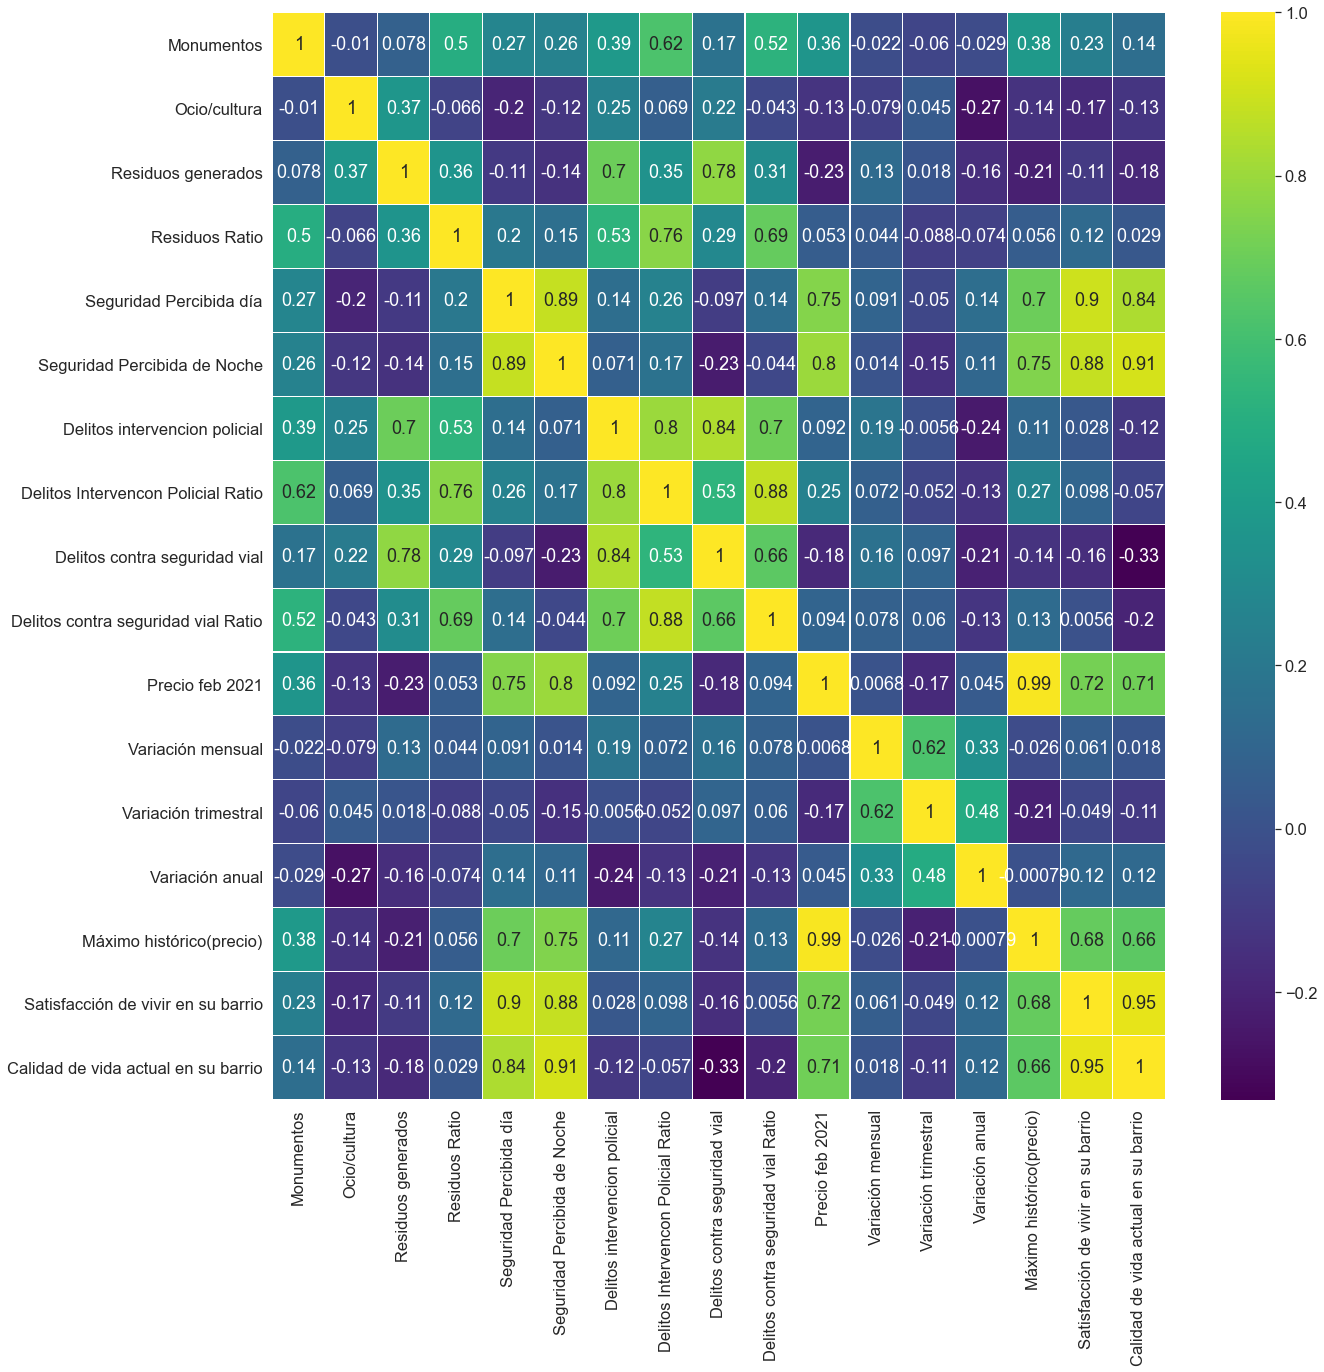

In [28]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_calidad.corr(), cmap='viridis',linewidths=.05, annot =True)
sns.set(font_scale=1)

#### ESTUDIO VIVIENDA

<font color= "1F284B" >Creamos un dataframe agrupado por distritos y nos quedamos con el precio.</font>

In [29]:
df_media_precio= df.sort_values("Precio", ascending = False).groupby("Distrito")["Precio"].mean()
df_media_precio = pd.DataFrame(df_media_precio).reset_index().sort_values("Precio", ascending =False)

<font color= "1F284B" >Creamos un dataframe agrupado por distritos y nos quedamos con el precio/m2.</font>

In [30]:
df_media_preciom2= df.sort_values("Precio/m2", ascending = False).groupby("Distrito")["Precio/m2"].mean()
df_media_preciom2 = pd.DataFrame(df_media_preciom2).reset_index().sort_values("Precio/m2", ascending =False)

<font color= "1F284B" >Creamos un dataframe agrupado por distritos y nos quedamos con el máximo histórico.</font>

In [31]:
df_max= df.sort_values("Máximo histórico(precio)", ascending = False).groupby("Distrito")["Máximo histórico(precio)"].mean()
df_max = pd.DataFrame(df_max).reset_index().sort_values("Máximo histórico(precio)", ascending =False)

<font color= "1F284B" >Creamos las capas que va a tener nuestro mapa.</font>

In [32]:
lat_madrid_mapa4 = 40.4167
long_madrid_mapa4 = -3.70325
mapa_madrid_mapa4 = folium.Map(location=[lat_madrid_mapa4, long_madrid_mapa4], tiles=None, zoom_start=10, overlay=False)
fg0_mapa4 = folium.FeatureGroup(name="Precio", overlay=False).add_to(mapa_madrid_mapa4)
fg1_mapa4 = folium.FeatureGroup(name="Precio/m2", overlay=False).add_to(mapa_madrid_mapa4)
fg2_mapa4 = folium.FeatureGroup(name="Máximo precio histórico", overlay=False).add_to(mapa_madrid_mapa4)

choropleth_mapa4_1 = folium.Choropleth(
    geo_data=datos,
    highlight=False,
    name="Precio",
    data=df_media_precio,
    columns=["Distrito", "Precio"],
    key_on='feature.properties.name',
    fill_color='YlGnBu'
).geojson.add_to(fg0_mapa4)

choropleth_mapa4_2 = folium.Choropleth(
    geo_data=datos,
    name="Precio/m2",
    data=df_media_preciom2,
    columns=["Distrito", "Precio/m2"],
    key_on='feature.properties.name',
    fill_color='YlGnBu'
).geojson.add_to(fg1_mapa4)

choropleth_mapa4_3 = folium.Choropleth(
    geo_data=datos,
    name="Máximo precio histórico",
    data=df_max,
    columns=["Distrito", "Máximo histórico(precio)"],
    key_on='feature.properties.name',
    fill_color='YlGnBu'
).geojson.add_to(fg2_mapa4)

<font color= "1F284B" >Le damos características a las capas.</font>

In [33]:
style_function = "font-size: 16px; font-weight: bold"

folium.features.GeoJsonTooltip(
    ['name'],
    style=style_function,
    labels=False
).add_to(choropleth_mapa4_1)

folium.features.GeoJsonTooltip(
    ['name'],
    style=style_function,
    labels=False
).add_to(choropleth_mapa4_2)

folium.features.GeoJsonTooltip(
    ['name'],
    style=style_function,
    labels=False
).add_to(choropleth_mapa4_3)

folium.TileLayer(
    "cartodbpositron",
    overlay=True,
    name="light mode"
).add_to(choropleth_mapa4_1)

folium.TileLayer(
    "cartodbpositron",
    overlay=True,
    name="light mode"
).add_to(choropleth_mapa4_2)

folium.TileLayer(
    "cartodbpositron",
    overlay=True,
    name="light mode"
).add_to(choropleth_mapa4_3)

pines_mapa4_1 = plugins.MarkerCluster().add_to(choropleth_mapa4_1)

for lat, lng, label, in zip(df_agrupado_distritos.Latidud, df_agrupado_distritos.Longitud, round(df_agrupado_distritos["Precio"].astype("float"),2)):
    folium.Marker(location=[lat, lng],
                  icon=folium.DivIcon(icon_size=(200,36),
                                      icon_anchor=(0,0),
                                      html='<div style="font-size: 10pt">Precio: %s</div>' % label)
                 ).add_to(pines_mapa4_1)
    
pines_mapa4_2 = plugins.MarkerCluster().add_to(choropleth_mapa4_2)

for lat, lng, label, in zip(df_agrupado_distritos.Latidud, df_agrupado_distritos.Longitud, round(df_agrupado_distritos["Precio/m2"].astype("float"),2)):
    folium.Marker(location=[lat, lng],
                  icon=folium.DivIcon(icon_size=(200,36),
                                      icon_anchor=(0,0),
                                      html='<div style="font-size: 10pt">Precio/m2: %s</div>' % label)
                 ).add_to(pines_mapa4_2)
    
pines_mapa4_3 = plugins.MarkerCluster().add_to(choropleth_mapa4_3)

for lat, lng, label, in zip(df_agrupado_distritos.Latidud, df_agrupado_distritos.Longitud, round(df_agrupado_distritos["Máximo histórico(precio)"].astype("float"),2)):
    folium.Marker(location=[lat, lng],
                  icon=folium.DivIcon(icon_size=(200,36),
                                      icon_anchor=(0,0),
                                      html='<div style="font-size: 10pt">Máximo histórico de precio por distrito: %s</div>' % label)
                 ).add_to(pines_mapa4_3)
    
folium.LayerControl(collapsed=False).add_to(mapa_madrid_mapa4)
mapa_madrid_mapa4